# Research hypotheses supported by the literature

The objective of this work is to study which structural, qualitative, and locational characteristics of a residential property significantly affect its market price.

The *Ames Housing Dataset* provides detailed information on dwellings sold in Ames (Iowa) and is an updated version of the Boston Housing Dataset, already widely used in the housing econometrics literature. With its 2930, the *Ames Housing Dataset* offers a larger sample size and a more comprehensive set of features and it is better suited for modern statistical analysis.

Ames dataset includes physical size, construction details, quality ratings, and neighborhood indicators, all variables on which we formulate a series of hypotheses grounded in empirical findings from the real-estate and housing-econometrics literature.

## Fundamentals variables and assumptions

We found that about 80% of the variation in residential sales price can be explained by simply taking into consideration the neighborhood and total square footage (`Total Bsmt SF` + `Gr Liv Area`) of the dwelling \cite{DeCock2011}.

According to our interpretation of the literature published \cite{Han2023} \cite{Zietz2008} and our empirical reasoning, we consider the variables that significantly affect the sale price of a house are the following.

### The overall quality of the house has a strong positive impact on sale price

Several studies show that global quality assessments summarise multiple latent characteristics (materials, workmanship, design), making them among the most informative predictors of house value.

Abdulhafedh (2022) identifies `OverallQual` as one of the most influential variables in explaining sale price in a multiple regression framework.

Similar evidence is reported in Yu (2022) and Han (2023), where overall quality consistently appears as the strongest determinant in both OLS and regularized regression models.

### The above-ground living area (`GrLivArea`) is positively associated with the price of a house

The hedonic pricing literature traditionally recognises physical size as a primary contributor to housing value.

> The **hedonic pricing model** is an economic model that explains the price of a good as the sum (or combination) of the values of its attributes.
In other words, a complex good is “decomposed” into its components, and the total price reflects the contribution of each of them.
>
>The concept was introduced by Lancaster in 1966 in consumer theory and was first applied to housing prices by Rosen in 1974.

Abdulhafedh (2022) highlights that the main livable area is among the variables with the highest explanatory power. Studies on the Ames dataset (e.g., Ye 2024; Han 2023) similarly identify `GrLivArea` as one of the strongest continuous predictors.

### The total basement area (`TotalBsmtSF`) also increases house price, independently from the above-ground area

Basements provide additional functional space and generally correlate with larger, higher-value homes.

Multiple analyses of the Ames dataset (Han 2023; Yu 2022) show that basement size maintains statistical significance even when controlling for other structural variables.
Abdulhafedh (2022) also finds that basement-related features contribute substantially to the model fit.

### Newer or recently renovated houses (`YearBuilt`, `YearRemodAdd`) tend to have higher sale prices

The literature on housing depreciation demonstrates that structural aging reduces property value unless offset by renovations.

According to Abdulhafedh (2022), both the construction year and the remodeling year play an important role in predicting sale prices.

Other studies on the Ames dataset reinforce this conclusion, noting that newer homes or homes with extensive remodeling command a price premium.

### Higher-quality kitchens and exterior materials positively affect sale price

Studies in real-estate economics show that buyers are particularly sensitive to the quality of kitchens, bathrooms, and exterior finishes, as these elements influence both functionality and aesthetic appeal.

`KitchenQual` and `ExterQual` are repeatedly found to be statistically significant predictors in analyses using the Ames dataset (Ye 2024; Abdulhafedh 2022).
Both variables capture qualitative assessments not reflected solely by house size.

### Neighborhood characteristics significantly affect sale price, even after controlling for structural attributes.

Location remains one of the most important determinants of housing prices in hedonic models.

The Ames dataset includes a categorical variable (`Neighborhood`) that encodes proximity to schools, income areas, and local amenities.

Previous studies (e.g., De Cock 2011; Ye 2024) demonstrate that location dummies remain significant even in fully specified regression models.

## Variables we remove

First, we remove the variables `Pool QC`, `Alley`, `Fence` and `Misc Feature` since they contain too many missing values (`NaN`).
The remaining variables would be available and ready for analysis but, as we have shown, including irrelevant variables increases the standard errors, which leads to less powerful significance tests and wider confidence intervals, and therefore to less precise statistical inference.

For this reason we have not considered many of the 82 explanatory variables, mainly because many of them refer to the same part of the house (such as `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` for the description of the basement), and therefore may be highly correlated and they generate high standard errors, also because we belive that some of them have a negligeable impact on sale prices. In order to obtain a more parsimonious model, with an higher $R^2$ adjusted and lower $AIC$ and $BIC$ we have decided to exclude these variables from the analysis.

An examlple of such variables are:

- `PID` is just an identification number wich does not provide any information about the house price
- `Lot Front` is the length of street connected to the property, which is not relevant for the price (on one hand a larger front may be better, on the other hand it may mean more noise and traffic)
- `Lot Shape` and `Land Contour` are less relevant than other locational attributes like neighborhood
- `Fireplaces` is the number of fireplaces, which is an outdated feature that does not affect the price significantly
- `Fireplace Qu` is the quality of the fireplaces, which is of secondary importance compared to other quality features like kitchen and exterior quality
- `Roof Style` and `Roof Matl` are of secondary importance compared to other features such as quality and size
- `Condition 1` indicates the proximity to various conditions (e.g., arterial roads, railroads), but `Neighborhood` already captures location effects more comprehensively plus there is still the noise factor

# Description of the Dataset

The analysis is based on the *Ames Housing Dataset*, a well-known real-estate dataset originally compiled by the Assessor’s Office of Ames, Iowa. It contains detailed information on residential properties sold between 2006 and 2010.

In its full version, the dataset includes 82 explanatory variables describing structural, qualitative, locational, and functional characteristics of each house.

For the purpose of this assignment, we selected a subset of the variables most commonly used in hedonic price models and supported by the literature.

## General structure of the dataset

Each row of the dataset corresponds to a single residential property, while columns represent the attributes listed above.

Numerical variables are measured either in square feet or in calendar years, whereas qualitative assessments use an ordinal scale.
The dataset does not contain missing values for the variables selected for the analysis, and therefore no imputation was required in this step.

The dependent variable of the regression is `SalePrice`, expressed in US dollars. and the selected explanatory variables fall into the four following categories.

### Size and structural characteristics

These variables capture the physical dimensions of the dwelling:

- `Gr Liv Area`: above-ground living area (in square feet)
- `1st Flr SF`: first-floor area
- `Total Bsmt SF`: total basement area
- `Lot Area`: size of the lot
- `Full Bath`: number of full bathrooms
- `Garage Area`: size of the garage
- `Garage Cars`: garage capacity (number of cars)
- `Garage Yr Blt`: year the garage was built
- `Year Built`: construction year of the house
- `Year Remod/Add`: year of the most recent remodeling
- `Utilities`: type of utilities available

These attributes quantify the amount of usable space and the structural age of the property.

### Quality assessments

The dataset includes several ordinal ratings assigned by professional assessors:

- `Overall Qual`: overall material and finish quality
- `Kitchen Qual`: quality of kitchen materials
- `ExterQual`: assessment of exterior materials and workmanship
- `BsmtQual`: quality of basement materials

These variables summarize qualitative features that are not captured by size alone.

### Locational and timing information

- `Neighborhood`: categorical variable identifying the physical location within the city of Ames
- `MS Zoning`: categorical variable indicating the general zoning classification such as low‑density residential, medium‑density residential, or commercial
- `Year Sold`: year the property was sold

This variable incorporates locational amenities and neighbourhood-level characteristics that influence market value.

# Model Specification and Estimation

The aim of this section is to construct a multiple linear regression model in order to explain the variation in the sale price of residential properties.

The dependent variable is `SalePrice`, while the set of regressors includes the structural, qualitative, and locational characteristics identified in the previous section.

## Model Specification
The regression model is specified as follows:

$$
\begin{aligned}
\mathrm{SalePrice}_i &= 
\beta_0
+ \beta_1\,\mathrm{Gr Liv Area}_i
+ \beta_2\,\mathrm{1st Flr SF}_i
+ \beta_3\,\mathrm{Total Bsmt SF}_i
+ \beta_4\,\mathrm{Lot Area}_i\\
&\quad + \beta_5\,\mathrm{Full Bath}_i
+ \beta_6\,\mathrm{Garage Area}_i
+ \beta_7\,\mathrm{Garage Cars}_i
+ \beta_8\,\mathrm{Garage Yr Blt}_i\\
&\quad + \beta_9\,\mathrm{Year Built}_i
+ \beta_{10}\,\mathrm{Year Remod/Add}_i
+ \beta_{11}\,\mathrm{Utilities}_i
+ \beta_{12}\,\mathrm{Overall Qual}_i\\
&\quad + \beta_{13}\,\mathrm{Kitchen Qual}_i
+ \beta_{14}\,\mathrm{Exter Qual}_i
+ \beta_{15}\,\mathrm{Bsmt Qual}_i
+ \beta_{15}\,\mathrm{Neighborhood}_i\\
&\quad + \beta_{16}\,\mathrm{MS Zoning}_i
+ \beta_{16}\,\mathrm{Year Sold}_i
+ \varepsilon_i
\end{aligned}
$$

where:

- $\beta_0$ is the intercept
- $\beta$'s denote the coefficients associated with each regressor
- $\varepsilon_i$ is the error term capturing unobserved factors
- the `Neighborhood` variable is treated as a categorical factor and encoded through dummy variables

## Model Assumptions

Our multiple linear regression model is estimated under the following assumptions:

- linearity of the *conditional mean*
$$
\mathbb{E}[\varepsilon_i \mid X_i] = 0
\ \Longleftrightarrow\ 
\mathbb{E}[Y_i \mid X_i]
  = \beta_0 + \beta_1 X_{i1} + \cdots + \beta_p X_{ip}
$$
This assumption implies that all systematic variation in the dependent variable is captured by the regressors.

- *independent and identically distributed* observations
$$
(Y_i, X_i) \;\perp\!\!\!\perp\; (Y_j, X_j)
\quad \text{for } i \neq j
$$
and all observations are drawn from the same population distribution. This corresponds to the standard *i.i.d.* sampling framework.

- finite *fourth moments*
$$
\mathbb{E}[X_{ik}^4] < \infty
\qquad\text{and}\qquad
\mathbb{E}[\varepsilon_i^4] < \infty
$$
This condition ensures the applicability of asymptotic results and prevents extreme observations from dominating the estimation.


## Python code

Here we list the full code used for the analysis with all comments and explanations.

In [1]:
import pandas as pd
import statsmodels.api as sm
from IPython.display import display

# Read AmesHousing.csv into the DataFrame df:
# each row represents a house
# each column represents a variable
df = pd.read_csv("AmesHousing.csv")

In [ ]:
# SalePricee is the target variable y
# (the dependent variable)
y = df["SalePrice"]

# regressors is a list of column names that I want to use as regressors in the model,
# chosen from the 82 variables available in the dataset
regressors = [
    "Gr Liv Area",
    "1st Flr SF",
    "Total Bsmt SF",
    "Lot Area",
    "Full Bath",
    "Garage Area",
    "Garage Cars",
    "Garage Yr Blt",
    "Year Built",
    "Year Remod/Add",
    "Overall Qual",
    "Kitchen Qual",
    "Exter Qual",
    "Bsmt Qual",
    "Neighborhood",
    "MS Zoning",
    "Utilities",
]

In [3]:
# X is a new DataFrame that contains only the columns listed in regressors
X = df[regressors]

# Create dummy variables for the categorical variables:
# get_dummies converts categorical variables (strings) into a set of binary dummy columns
# "Neighborhood" -> ["Neighborhood_Blueste", "Neighborhood_BrDale", ...]
# "House Style"  -> ["House Style_1.5Unf", "House Style_1Story", ...]
# "Kitchen Qual" -> ["Kitchen Qual_Fa", "Kitchen Qual_Gd", ...]
# ...
# For each categorical variable, drop_first=True sorts the dummy columns alphanumerically, than drops the first one
# to avoid the dummy variable trap (perfect multicollinearity among the dummies). Numerical columns are left unchanged
X = pd.get_dummies(X, drop_first=True)

# Force all columns of X and y to be numeric
# errors="coerce" converts anything that cannot be converted to a number
# (weird string, empty space, symbol) into NaN
X = X.apply(pd.to_numeric, errors="coerce")
y = pd.to_numeric(y, errors="coerce")

# Combine the y column and all X columns into a single DataFrame
# Then use dropna() to remove all rows that contain at least one NaN in any column.
# e.g., if "SalePrice", "Gr Liv Area", one of the dummy columns is missing, or a string was coerced to NaN
# | y  | x1 | x2 | ... |
# |----|----|----|-----|
# | ** | ** | ** | ... |
# | ** | ** | ** | ... |
data = pd.concat([y, X], axis=1).dropna()

# Take the SalePrice column (y) from the cleaned DataFrame and convert it to a NumPy float array -> y_clean: n*1 vector
# Take all remaining columns and convert them to a NumPy float array                             -> X_clean: n*k matrix
y_clean = data["SalePrice"].to_numpy(dtype=float)
X_clean = data.drop(columns=["SalePrice"]).to_numpy(dtype=float)

# Add a column of ones to the matrix (the intercept b_0)
X_clean = sm.add_constant(X_clean)

# Create the OLS model object and call fit() to estimate the coefficients (b̂) by minimizing the sum of squared residuals:
# given y = X*b + e, it finds the b̂ that make the residuals as small as possible
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     280.9
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:54:57   Log-Likelihood:                -32513.
No. Observations:                2770   AIC:                         6.514e+04
Df Residuals:                    2712   BIC:                         6.549e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.876e+05   1.32e+05     -6.724      0.0

## Interpretation of the regression output

The OLS regression is estimated on 2,770 observations.  
The dependent variable is `SalePrice`, while the regressors include size variables, quality indicators, age/renovation variables and a set of dummies for neighbourhood, zoning and utilities.

### Overall fit of the model

The model displays a relatively high goodness of fit:

- `R-squared` = 0.855  
- `Adjusted R-squared` = 0.852

This means that about 85% of the variation in house prices in the sample is explained by the regressors included in the model.  

The `F-statistic` is 280.9 with a `p-value` essentially equal to zero, so the null hypothesis that all slope coefficients are jointly equal to zero is strongly rejected. Taken together, the explanatory variables have a statistically significant impact on `SalePrice`.

### Interpretation of the main coefficients

The first group of coefficients (x1–x11) corresponds to the “core” numeric regressors (size, age, quality):

- `x1` $\approx 44.4$ (`Gr Liv Area`) is positive and highly significant 
  Interpreting it as the coefficient on above-ground living area, it suggests that, ceteris paribus, an additional square foot of living area increases the sale price by about 44 dollars.
- `x3` $\approx 23.4$ (`Total Bsmt SF`) is also positive and highly significant, indicating that extra basement area is rewarded in the market (around 23 dollars per square foot)
- `x4` $\approx 0.62$ (`Lot Area`) is positive and significant: larger lots are associated with higher prices, although the marginal effect per square foot is much smaller than for interior living space or basement area
- `x5` $\approx –3,756$ (`Full Bath`) is negative and statistically significant at the 5% level.  
  This is somewhat counter-intuitive, but it can be explained by multicollinearity: once we condition on total size and quality, adding one more full bathroom at fixed size may capture houses with a different layout rather than genuinely higher quality
- `x6` $\approx 16.6$ (`Garage Area`) and `x7` $\approx 7,228$ (`Garage Cars`) are both positive and significant, meaning that larger garages and the capacity to park more cars are rewarded by the market
- `x8` (`Garage Yr Blt`) is not statistically significant (p $\approx 0.41$), suggesting that, after controlling for the other variables, the construction year of the garage does not have a clear marginal effect
- `x9` $\approx 247.3$ (`Year Built`) and `x10` $\approx 259.2$ (`Year Remod/Add`) are positive and highly significant: newer houses and more recently renovated properties tend to sell at higher prices, in line with the idea that buyers pay a premium for newer structures and recent improvements
- `x11` $\approx 12,610$ (`Overall Qual`) is positive and extremely significant
  A one-point increase in the overall quality rating is associated with roughly 12–13 thousand dollars more in sale price, everything else being equal.  
  This confirms the strong role of quality emphasised in the hedonic pricing literature.

The next coefficients (`x12`, `x13`, `x15`–`x20`, `x22`, etc.) correspond to dummy variables created from `Kitchen Qual`, `Exter Qual` and `Bsmt Qual`.
Most of these are negative and highly significant, because the baseline category is the highest quality level, and the dummies measure the price discount associated with having a lower quality relative to that baseline.  
In other words, houses with worse kitchen, exterior or basement quality sell at systematically lower prices.

The block of coefficients starting around `x28`–`x41` corresponds mostly to `Neighborhood` dummies.  
Some neighbourhoods show large positive and significant coefficients (for example, `x32`, `x40`, `x41`, `x47`, `x48`, `x49`), indicating that these areas command sizeable price premia relative to the omitted reference neighbourhood.  
Other neighbourhood coefficients are not statistically significant, suggesting that, after controlling for structural and quality characteristics, their effect on price is not clearly distinguishable from zero.

Finally, the last coefficients (approximately `x50`–`x57`) represent dummies for `MS Zoning` and `Utilities`.  
Most of them are not statistically significant (p-values well above 0.05), which indicates that, in this specification, zoning and utilities categories do not add much explanatory power once size, quality and neighbourhood are already in the model.

## Covariance matrix

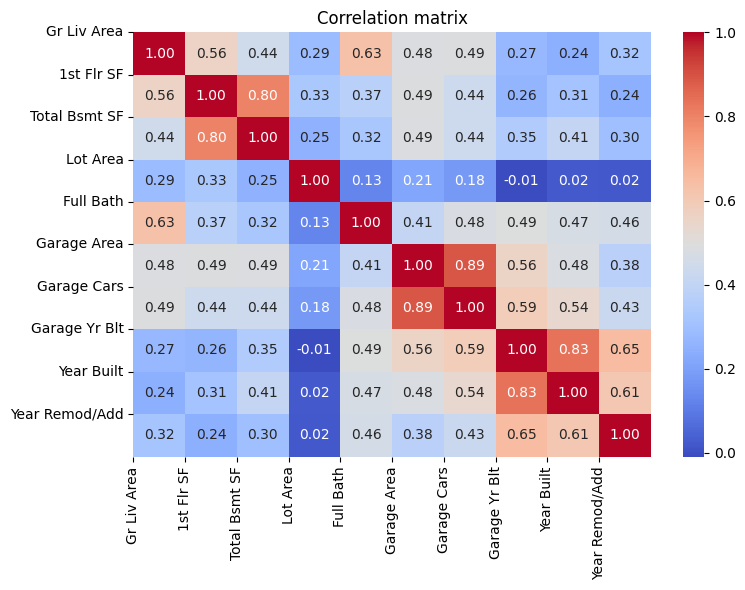

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# select only the relevant numeric columns
num_vars = [
    "Gr Liv Area",
    "1st Flr SF",
    "Total Bsmt SF",
    "Lot Area",
    "Full Bath",
    "Garage Area",
    "Garage Cars",
    "Garage Yr Blt",
    "Year Built",
    "Year Remod/Add",
]

corr = df[num_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

# colormap dafault
# im = plt.imshow(corr, vmin=-1, vmax=1)

plt.xticks(np.arange(len(num_vars)), num_vars, rotation=90)
plt.yticks(np.arange(len(num_vars)), num_vars)

# colorbar (to be used with the colormap)
# plt.colorbar(im, fraction=0.046, pad=0.04)

plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

\bibliographystyle{alpha}
\bibliography{references}